In [1]:
%matplotlib inline

In [2]:
import pandas as pd

In [3]:
train = pd.read_csv('train_1125.csv')
train

,Unnamed: 0,top col,time,hour,weekday_x,is_workday,line10,line15,date,weather_day,...,temp_night_y,wind_day_y,wind_night_y,weekday,workday,big_wind,weather_change,day_not_rain,day_small_rain,big_rain
0,0,0,2014-08-01 06:00:00,6,4,1,1118,521,8/1/14,晴,...,26,无持续风向≤3级,无持续风向≤3级,4,1,0,0,1,0,0
1,1,1,2014-08-01 07:00:00,7,4,1,4448,1945,8/1/14,晴,...,26,无持续风向≤3级,无持续风向≤3级,4,1,0,0,1,0,0
2,2,2,2014-08-01 08:00:00,8,4,1,4964,2617,8/1/14,晴,...,26,无持续风向≤3级,无持续风向≤3级,4,1,0,0,1,0,0
3,3,3,2014-08-01 09:00:00,9,4,1,3158,1597,8/1/14,晴,...,26,无持续风向≤3级,无持续风向≤3级,4,1,0,0,1,0,0
4,4,4,2014-08-01 10:00:00,10,4,1,2691,1032,8/1/14,晴,...,26,无持续风向≤3级,无持续风向≤3级,4,1,0,0,1,0,0
5,5,5,2014-08-01 11:00:00,11,4,1,1965,832,8/1/14,晴,...,26,无持续风向≤3级,无持续风向≤3级,4,1,0,0,1,0,0
6,6,6,2014-08-01 12:00:00,12,4,1,1963,751,8/1/14,晴,...,26,无持续风向≤3级,无持续风向≤3级,4,1,0,0,1,0,0
7,7,7,2014-08-01 13:00:00,13,4,1,1934,739,8/1/14,晴,...,26,无持续风向≤3级,无持续风向≤3级,4,1,0,0,1,0,0
8,8,8,2014-08-01 14:00:00,14,4,1,1946,799,8/1/14,晴,...,26,无持续风向≤3级,无持续风向≤3级,4,1,0,0,1,0,0
9,9,9,2014-08-01 15:00:00,15,4,1,2209,806,8/1/14,晴,...,26,无持续风向≤3级,无持续风向≤3级,4,1,0,0,1,0,0


In [ ]:
train.groupby(['Deal_time','Line_name','Card_type']).count().to_csv('count_card_type_1124.csv')

In [4]:
divide = pd.read_csv('1124_divide.csv')


In [16]:
train = pd.read_csv('train_1125.csv')
predict = pd.read_csv('predict_1125.csv')
print(train.shape)
print(predict.shape)

(2208, 87)
(112, 72)


In [5]:
y_divided = pd.merge(train, divide, on='time')

In [15]:
y_divided.to_csv('y_divided_1124.csv')

0.759214605461


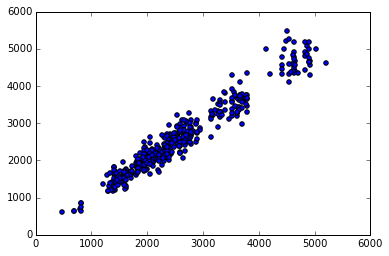

0.715430217581


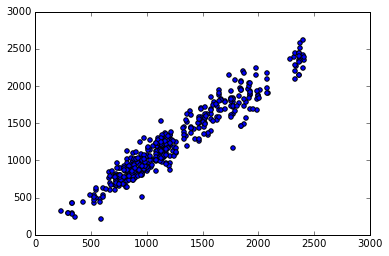

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import cross_validation

X = train.as_matrix(columns=['is_workday',\
'is_monday','is_tuesday','is_wednesday','is_thursday',\
'is_friday','is_saturday','is_Sunday',\
                             '6','7','8','9',\
    '10','11','12','13','14','15','16','17','18','19','20','21',\
    'big_wind','weather_change','day_not_rain','day_small_rain','big_rain'])
y10 = train.as_matrix(columns=['line10']).ravel()
y15 = train.as_matrix(columns=['line15']).ravel()

X_train, X_test, y10_train, y10_test, y15_train, y15_test = cross_validation.train_test_split(
    X, y10, y15, test_size=0.2, random_state=0)

clf10 = RandomForestRegressor(n_estimators=500)
clf10 = clf10.fit(X_train, y10_train)

clf15 = RandomForestRegressor(n_estimators=500)
clf15 = clf15.fit(X_train, y15_train)

y10_pred_rf = clf10.predict(X_test)
y15_pred_rf = clf15.predict(X_test)

precision(y10_pred_rf,y10_test)
precision(y15_pred_rf,y15_test)

In [10]:
def precision(y_pred, y_real):
    """ cal precision:
    
    input two list
    output precision and plot(to do)
    """
    import math
    import statistics
    import matplotlib.pyplot as plt
    
    deviation = []
    
    for i in range(0, len(y_pred)):
        deviation.append(math.fabs(y_pred[i] - y_real[i]) / y_real[i])
    
    #print(deviation)
    
    for i in range(0, len(deviation)):
        if deviation[i] > 0.3:
            deviation[i] = 0
        else:
            deviation[i] = 1 - 1 / 0.3 * deviation[i]
    #print(deviation)
    print(statistics.mean(deviation))
    plt.scatter(y_pred, y_real)
    plt.show()

0.778392912241


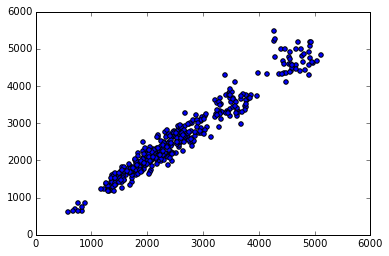

0.731280949599


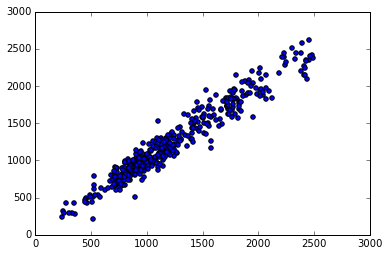

In [11]:
y10_pred_rf = clf10.predict(X_test)
y15_pred_rf = clf15.predict(X_test)

precision(y10_pred_rf,y10_test)
precision(y15_pred_rf,y15_test)

In [14]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import cross_validation

X = y_divided.as_matrix(columns=['is_workday','temp_day_x','temp_night_x',\
'is_monday','is_tuesday','is_wednesday','is_thursday',\
'is_friday','is_saturday','is_Sunday',\
'day_sunny','day_cloudy','day_yin','day_mai','day_zhenyu',\
'day_leizhenyu','day_xiaoyu','day_xiaodaozhongyu','day_zhongyu',\
    'day_zhongdaodayu','day_dayu','day_dadaobaoyu',\
    'night_sunny','night_cloudy','night_yin','night_mai','night_zhenyu',\
    'night_leizhenyu','night_xiaoyu','night_xiaodaozhongyu','night_zhongyu',\
    'night_zhongdaodayu','night_dayu','night_dadaobaoyu','6','7','8','9',\
    '10','11','12','13','14','15','16','17','18','19','20','21',\
    'big_wind','weather_change','day_not_rain','day_small_rain','big_rain'])
y10 = y_divided.as_matrix(columns=['student10']).ravel()
y15 = y_divided.as_matrix(columns=['student15']).ravel()

X_train, X_test, y10_train, y10_test, y15_train, y15_test = cross_validation.train_test_split(
    X, y10, y15, test_size=0.2, random_state=0)

clf10 = GradientBoostingRegressor(n_estimators=500, learning_rate=0.1,
    max_depth=3, random_state=0, loss='ls')
clf10 = clf10.fit(X_train, y10_train)

clf15 = GradientBoostingRegressor(n_estimators=500, learning_rate=0.1,
    max_depth=3, random_state=0, loss='ls')
clf15 = clf15.fit(X_train, y15_train)

print(clf10.score(X_train, y10_train))
print(clf10.score(X_test, y10_test))
print(clf15.score(X_train, y15_train))
print(clf15.score(X_test, y15_test))

0.925585098226
0.868378180176
0.901300696587
0.821672424332


In [12]:
X_predict = predict.as_matrix(columns=['is_workday','temp_day','temp_night',\
'is_monday','is_tuesday','is_wednesday','is_thursday',\
'is_friday','is_saturday','is_Sunday',\
'day_sunny','day_cloudy','day_yin','day_mai','day_zhenyu',\
'day_leizhenyu','day_xiaoyu','day_xiaodaozhongyu','day_zhongyu',\
    'day_zhongdaodayu','day_dayu','day_dadaobaoyu',\
    'night_sunny','night_cloudy','night_yin','night_mai','night_zhenyu',\
    'night_leizhenyu','night_xiaoyu','night_xiaodaozhongyu','night_zhongyu',\
    'night_zhongdaodayu','night_dayu','night_dadaobaoyu','6','7','8','9',\
    '10','11','12','13','14','15','16','17','18','19','20','21'])
print(X_predict.shape)

predict_final = predict

for card_type in ['normal','old','student','police','disabled','crew']:
    
    y10_predict = models[card_type][0].predict(X_predict)
    #print(y10_predict)
    y15_predict = models[card_type][1].predict(X_predict)
    #print(y15_predict)
    #predicts[card_type] = [y10_predict, y15_predict]
    s10 = pd.Series(y10_predict, name=card_type+'10').astype(int)
    s15 = pd.Series(y15_predict, name=card_type+'15').astype(int)
    predict_final = pd.concat([predict_final, s10, s15], axis=1)

(112, 50)


In [13]:
predict_final

,top col,hour,weekday_x,is_workday,date,weather_day,weather_night,temp_day,temp_night,wind_day,...,old10,old15,student10,student15,police10,police15,disabled10,disabled15,crew10,crew15
0,0,6,6,0,1/1/15,晴,晴,19,6,无持续风向≤3级,...,116,49,0,3,0,0,1,1,6,1
1,1,7,6,0,1/1/15,晴,晴,19,6,无持续风向≤3级,...,360,155,99,56,0,0,14,4,12,4
2,2,8,6,0,1/1/15,晴,晴,19,6,无持续风向≤3级,...,538,248,115,87,0,0,13,6,11,8
3,3,9,6,0,1/1/15,晴,晴,19,6,无持续风向≤3级,...,669,307,116,77,0,0,17,11,13,7
4,4,10,6,0,1/1/15,晴,晴,19,6,无持续风向≤3级,...,714,375,122,76,0,0,20,9,15,6
5,5,11,6,0,1/1/15,晴,晴,19,6,无持续风向≤3级,...,534,286,121,89,0,0,18,7,11,6
6,6,12,6,0,1/1/15,晴,晴,19,6,无持续风向≤3级,...,373,149,127,97,0,0,15,5,13,6
7,7,13,6,0,1/1/15,晴,晴,19,6,无持续风向≤3级,...,426,203,151,93,0,0,15,6,16,7
8,8,14,6,0,1/1/15,晴,晴,19,6,无持续风向≤3级,...,495,223,157,92,0,0,19,8,19,7
9,9,15,6,0,1/1/15,晴,晴,19,6,无持续风向≤3级,...,445,167,192,84,0,0,19,5,20,5


In [14]:
'normal','old','student','police','disabled','crew'
predict_final['y10'] = (predict_final.old10 + predict_final.student10 + 
                        predict_final.normal10 + predict_final.police10+
                        predict_final.disabled10 + predict_final.crew10)
predict_final['y15'] = (predict_final.old15 + predict_final.student15 + 
                        predict_final.normal15 + predict_final.police15+
                        predict_final.disabled15 + predict_final.crew15)

In [29]:
predict_final

,top col,hour,weekday_x,is_workday,date,weather_day,weather_night,temp_day,temp_night,wind_day,...,student10,student15,police10,police15,disabled10,disabled15,crew10,crew15,y10,y15
0,0,6,6,0,1/1/15,晴,晴,19,6,无持续风向≤3级,...,9,6,0,0,2,0,6,2,494,220
1,1,7,6,0,1/1/15,晴,晴,19,6,无持续风向≤3级,...,85,44,0,0,13,5,10,5,1730,859
2,2,8,6,0,1/1/15,晴,晴,19,6,无持续风向≤3级,...,109,90,0,0,15,7,10,10,2627,1443
3,3,9,6,0,1/1/15,晴,晴,19,6,无持续风向≤3级,...,119,87,0,0,20,11,13,5,2680,1428
4,4,10,6,0,1/1/15,晴,晴,19,6,无持续风向≤3级,...,125,80,0,0,20,9,11,5,2657,1414
5,5,11,6,0,1/1/15,晴,晴,19,6,无持续风向≤3级,...,114,83,0,0,17,7,11,8,2222,1269
6,6,12,6,0,1/1/15,晴,晴,19,6,无持续风向≤3级,...,144,105,0,0,15,6,12,7,2118,1045
7,7,13,6,0,1/1/15,晴,晴,19,6,无持续风向≤3级,...,166,95,0,0,19,6,17,7,2419,1099
8,8,14,6,0,1/1/15,晴,晴,19,6,无持续风向≤3级,...,172,103,0,0,21,8,20,8,2688,1302
9,9,15,6,0,1/1/15,晴,晴,19,6,无持续风向≤3级,...,181,98,0,0,21,6,21,6,2571,1179


In [15]:
predict_final[['date','hour','y10','y15']].to_csv('predict_gbrt_1125.csv')

In [16]:
y_divided

,top col,time,hour,weekday_x,is_workday,line10,line15,date,weather_day,weather_night,...,disabled10,disabled15,normal10,normal15,old10,old15,police10,police15,student10,student15
0,0,2014-08-01 06:00:00,6,4,1,1118,521,8/1/14,晴,雷阵雨,...,9,0,818,387,238,96,0,0,46,31
1,1,2014-08-01 07:00:00,7,4,1,4448,1945,8/1/14,晴,雷阵雨,...,20,15,3714,1629,528,201,1,0,163,90
2,2,2014-08-01 08:00:00,8,4,1,4964,2617,8/1/14,晴,雷阵雨,...,35,14,4046,2149,675,306,2,0,182,134
3,3,2014-08-01 09:00:00,9,4,1,3158,1597,8/1/14,晴,雷阵雨,...,26,6,2207,1173,803,320,0,0,102,90
4,4,2014-08-01 10:00:00,10,4,1,2691,1032,8/1/14,晴,雷阵雨,...,21,7,1849,676,696,275,0,0,104,69
5,5,2014-08-01 11:00:00,11,4,1,1965,832,8/1/14,晴,雷阵雨,...,19,8,1369,550,480,217,0,0,88,54
6,6,2014-08-01 12:00:00,12,4,1,1963,751,8/1/14,晴,雷阵雨,...,14,5,1410,555,423,128,0,0,101,59
7,7,2014-08-01 13:00:00,13,4,1,1934,739,8/1/14,晴,雷阵雨,...,16,2,1472,544,331,126,1,0,93,64
8,8,2014-08-01 14:00:00,14,4,1,1946,799,8/1/14,晴,雷阵雨,...,13,3,1497,637,323,108,0,0,92,47
9,9,2014-08-01 15:00:00,15,4,1,2209,806,8/1/14,晴,雷阵雨,...,22,5,1672,605,366,124,0,0,122,69


In [19]:
weather = pd.read_csv('weather_1125.csv')
y_divided = pd.merge(y_divided, weather, on='date')

In [21]:
train = y_divided

In [22]:
train['day_not_rain'] = train.day_sunny + train.day_cloudy + train.day_yin + train.day_mai
train['day_small_rain'] = (train.day_zhenyu + train.day_leizhenyu + train.day_xiaoyu + 
 train.day_xiaodaozhongyu)
train['big_rain'] = (train.day_zhongyu + train.day_zhongdaodayu + 
    train.day_dayu + train.day_dadaobaoyu)

In [38]:
train

,top col,time,hour,weekday_x,is_workday,line10,line15,date,weather_day,weather_night,...,temp_night_y,wind_day_y,wind_night_y,weekday,workday,big_wind,weather_change,day_not_rain,day_small_rain,big_rain
0,0,2014-08-01 06:00:00,6,4,1,1118,521,8/1/14,晴,雷阵雨,...,26,无持续风向≤3级,无持续风向≤3级,4,1,0,0,1,0,0
1,1,2014-08-01 07:00:00,7,4,1,4448,1945,8/1/14,晴,雷阵雨,...,26,无持续风向≤3级,无持续风向≤3级,4,1,0,0,1,0,0
2,2,2014-08-01 08:00:00,8,4,1,4964,2617,8/1/14,晴,雷阵雨,...,26,无持续风向≤3级,无持续风向≤3级,4,1,0,0,1,0,0
3,3,2014-08-01 09:00:00,9,4,1,3158,1597,8/1/14,晴,雷阵雨,...,26,无持续风向≤3级,无持续风向≤3级,4,1,0,0,1,0,0
4,4,2014-08-01 10:00:00,10,4,1,2691,1032,8/1/14,晴,雷阵雨,...,26,无持续风向≤3级,无持续风向≤3级,4,1,0,0,1,0,0
5,5,2014-08-01 11:00:00,11,4,1,1965,832,8/1/14,晴,雷阵雨,...,26,无持续风向≤3级,无持续风向≤3级,4,1,0,0,1,0,0
6,6,2014-08-01 12:00:00,12,4,1,1963,751,8/1/14,晴,雷阵雨,...,26,无持续风向≤3级,无持续风向≤3级,4,1,0,0,1,0,0
7,7,2014-08-01 13:00:00,13,4,1,1934,739,8/1/14,晴,雷阵雨,...,26,无持续风向≤3级,无持续风向≤3级,4,1,0,0,1,0,0
8,8,2014-08-01 14:00:00,14,4,1,1946,799,8/1/14,晴,雷阵雨,...,26,无持续风向≤3级,无持续风向≤3级,4,1,0,0,1,0,0
9,9,2014-08-01 15:00:00,15,4,1,2209,806,8/1/14,晴,雷阵雨,...,26,无持续风向≤3级,无持续风向≤3级,4,1,0,0,1,0,0


In [24]:
train.to_csv('train_1125.csv')

In [26]:
predict = pd.read_csv('predict_features_1119.csv')
predict_data = pd.merge(predict, weather, on='date')
predict_data.to_csv('predict_join_1125.csv')

In [27]:
predict_data['day_not_rain'] = predict_data.day_sunny + predict_data.day_cloudy + predict_data.day_yin + predict_data.day_mai
predict_data['day_small_rain'] = (predict_data.day_zhenyu + predict_data.day_leizhenyu + predict_data.day_xiaoyu + 
 predict_data.day_xiaodaozhongyu)
predict_data['big_rain'] = (predict_data.day_zhongyu + predict_data.day_zhongdaodayu + 
    predict_data.day_dayu + predict_data.day_dadaobaoyu)

In [29]:
predict_data.to_csv('predict_1125.csv')

In [30]:
predict = predict_data

In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import cross_validation

models = {}

for card_type in ['student']:
    X = train.as_matrix(columns=['is_workday','temp_day_x','temp_night_x',\
    'is_monday','is_tuesday','is_wednesday','is_thursday',\
    'is_friday','is_saturday','is_Sunday','6','7','8','9',\
        '10','11','12','13','14','15','16','17','18','19','20','21','big_wind',\
        'weather_change','day_not_rain','day_small_rain','big_rain'])
    y10 = train.as_matrix(columns=[card_type+'10']).ravel()
    y15 = train.as_matrix(columns=[card_type+'15']).ravel()

    X_train, X_test, y10_train, y10_test, y15_train, y15_test = cross_validation.train_test_split(
        X, y10, y15, test_size=0.2, random_state=0)

    clf10 = RandomForestRegressor(n_estimators=500)
    clf10 = clf10.fit(X_train, y10_train)
    
    clf15 = RandomForestRegressor(n_estimators=500)
    clf15 = clf15.fit(X_train, y15_train)
    
    models[card_type] = [clf10, clf15]
    
    print(card_type)
    precision(clf10.predict(X_test),y10_test)
    precision(clf15.predict(X_test),y15_test)

student
0.481442366776
0.457966110101


In [67]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import cross_validation

models = {}

for card_type in ['normal','old','student','police','disabled','crew']:
    X = train.as_matrix(columns=['is_workday','temp_day_x','temp_night_x',\
    'is_monday','is_tuesday','is_wednesday','is_thursday',\
    'is_friday','is_saturday','is_Sunday','6','7','8','9',\
        '10','11','12','13','14','15','16','17','18','19','20','21','big_wind',\
        'weather_change','day_not_rain','day_small_rain','big_rain'])
    y10 = train.as_matrix(columns=[card_type+'10']).ravel()
    y15 = train.as_matrix(columns=[card_type+'15']).ravel()

    X_train, X_test, y10_train, y10_test, y15_train, y15_test = cross_validation.train_test_split(
        X, y10, y15, test_size=0.2, random_state=0)

    clf10 = GradientBoostingRegressor(n_estimators=500, learning_rate=0.1,
        max_depth=3, random_state=0, loss='ls')
    clf10 = clf10.fit(X_train, y10_train)
    
    clf15 = GradientBoostingRegressor(n_estimators=500, learning_rate=0.1,
        max_depth=3, random_state=0, loss='ls')
    clf15 = clf15.fit(X_train, y15_train)
    
    models[card_type] = [clf10, clf15]
    
    print(card_type)
    precision(clf10.predict(X_test),y10_test)
    precision(clf15.predict(X_test),y15_test)
    

normal
0.792526409061
0.743877252628
old
0.684513758636
0.593670558929
student
0.465016246673
0.447581956045
police
0.0302968316151
0.0
disabled
0.373235344839
0.256554081804
crew
0.376439892761
0.282215987168


In [68]:
X_predict = predict.as_matrix(columns=['is_workday','temp_day_x','temp_night_x',\
    'is_monday','is_tuesday','is_wednesday','is_thursday',\
    'is_friday','is_saturday','is_Sunday','6','7','8','9',\
        '10','11','12','13','14','15','16','17','18','19','20','21','big_wind',\
        'weather_change','day_not_rain','day_small_rain','big_rain'])
print(X_predict.shape)

predict_final = predict

for card_type in ['normal','old','student','police','disabled','crew']:
    y10_predict = models[card_type][0].predict(X_predict)
    #print(y10_predict)
    y15_predict = models[card_type][1].predict(X_predict)
    #print(y15_predict)
    #predicts[card_type] = [y10_predict, y15_predict]
    s10 = pd.Series(y10_predict, name=card_type+'10').astype(int)
    s15 = pd.Series(y15_predict, name=card_type+'15').astype(int)
    predict_final = pd.concat([predict_final, s10, s15], axis=1)

(112, 31)


In [12]:
X.shape

(2208, 55)

In [69]:
predict_final['y10'] = (predict_final.old10 + predict_final.student10 + 
                        predict_final.normal10 + predict_final.police10+
                        predict_final.disabled10 + predict_final.crew10)
predict_final['y15'] = (predict_final.old15 + predict_final.student15 + 
                        predict_final.normal15 + predict_final.police15+
                        predict_final.disabled15 + predict_final.crew15)

In [17]:
X_predict = predict.as_matrix(columns=['is_workday','temp_day_x','temp_night_x',\
'is_monday','is_tuesday','is_wednesday','is_thursday',\
'is_friday','is_saturday','is_Sunday',\
'day_sunny','day_cloudy','day_yin','day_mai','day_zhenyu',\
'day_leizhenyu','day_xiaoyu','day_xiaodaozhongyu','day_zhongyu',\
    'day_zhongdaodayu','day_dayu','day_dadaobaoyu',\
    'night_sunny','night_cloudy','night_yin','night_mai','night_zhenyu',\
    'night_leizhenyu','night_xiaoyu','night_xiaodaozhongyu','night_zhongyu',\
    'night_zhongdaodayu','night_dayu','night_dadaobaoyu','6','7','8','9',\
    '10','11','12','13','14','15','16','17','18','19','20','21',\
    'big_wind','weather_change','day_not_rain','day_small_rain','big_rain'])
print(X_predict.shape)
y10_predict = clf10.predict(X_predict)
#print(y10_predict)
y15_predict = clf15.predict(X_predict)
#print(y15_predict)

(112, 55)


In [18]:
s10 = pd.Series(y10_predict, name='y10').astype(int)
s15 = pd.Series(y15_predict, name='y15').astype(int)
predicted = pd.concat([predict, s10, s15], axis=1)
predicted[['date','hour','y10','y15']].to_csv('predict_rf_all_1125.csv')